# Índice
- [1. Importar todas las librerías necesarias (0.15 puntos)](#1)
- [2. Inicializar algunas variables que después modificaremos (0.15 puntos)
](#2)
- [3. Crear una función para generar los hostnames en base a unas reglas
(1.5 puntos)](#3)
- [4.Crear una función para obtener el nombre del SO (0.5 puntos)
](#4)
- [5.Crear una función para obtener el nombre del entorno (0.5 puntos)
](#5)
- [6.Creamos una función para obtener el nombre del país (0.5 puntos)](#6)
- [7.Crear una función para generar el DataFrame (1 punto)
](#7)
- [8.Crear el DataFrame (0.2 puntos)
](#8)
- [9.Guardar el DataFrame generado en un fichero CSV (0.5 puntos)
](#9)
- [10.Generar un único gráfico agrupando para cada país (country) los
entornos (enviroment) (0.5 puntos)](#10)
- [11..Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas (4.5
puntos)](#11)
    - [11.1.Figura 1 (Arriba izquierda)](#12)
    - [11.2.Figura 2 (Abajo izquierda)](#13)
    - [11.3.Figura 3 (Abajo derecha)](#14)
    - [11.4.Figura 4 (Arriba derecha)](#15)
    - [11.5.Figura completa todos los graficos juntos](#16)

## Importar las librerias necesarias
<a id="1"></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns # Libreria necesaria para el color en los graficos , sns.palette()

<a id="2"></a>
## Inicializar variables

In [2]:
df = None
hostnames = []
os = []
dataset = []

<a id="3"></a>
## Crear funcion set_hostnames

In [3]:
hostnames = []

def set_hostnames(number_of_hosts: int) -> None:
    os_prefix = ['L']*4 + ['S']*3 + ['A']*2 + ['H']*1  # 40% Linux | 30% Solaris | 20% AIX | 10% HP-UX
    enviroments = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    alpha_3_country_codes = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    grupo_alpha = []
    for i in range(number_of_hosts):
        country = random.choice(alpha_3_country_codes)
        hostname = random.choice(os_prefix) + random.choice(enviroments)
        hostname += country
        grupo_alpha.append(hostname)
        hostname += str(grupo_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

<a id="4"></a>
## Crear funcion para obtener el nombre del objeto

In [4]:
def get_os(hostname:str)->None:
    """
    Parametros:
    hostname (str): 

    Returns:
    os(str) : Linux,Solaris,AIX,HP-UX o Unknow.
    
    """
    if hostname.startswith('L'):
        return 'Linux'
    elif hostname.startswith('S'):
        return 'Solaris'
    elif hostname.startswith('A'):
        return 'AIX'
    elif hostname.startswith('H'):
        return 'HP-UX'
    else :
        return 'Unknow'

<a id="5"></a>
## Crear funcion para nombre del entorno

In [5]:
def get_environment(hostname:str)-> None:
    """
    Parametros:
    hostname (str): 

    Returns:
    Environment(str) : Integration,Testing,Development,Staging,Production o Unknow.
    
    """
    if hostname[1] == 'D':
        return 'Development'
    elif hostname[1] == 'I':
        return 'Integration'
    elif hostname[1] == 'T':
        return 'Testing'
    elif hostname[1] == 'S':
        return 'Staging'
    elif hostname[1] == 'P':
        return 'Production'
    else :
        return 'Unknow'

<a id="6"></a>
## Crear funcion para obtener nombre del pais

In [6]:
def get_country(hostname:str)-> None :
    """
    Parametros:
    hostname (str): 

    Returns:
    Paises(str): NOR,DEU,ITA,ESP,IRL,FRA o Unknow.
    
    """
    if hostname[2:5] ==  'NOR':
        return 'Norway'
    elif hostname[2:5] == 'DEU':
        return 'Germany'
    elif hostname[2:5] == 'ITA':
        return 'Italy'
    elif hostname[2:5] == 'ESP':
        return 'Spain'
    elif hostname[2:5] == 'IRL':
        return 'Ireland'
    elif hostname[2:5] == 'FRA':
        return 'France'
    else : 
        return 'Unknow'

<a id="7"></a>
## Crear funcion para generar un Dataframe

In [7]:
def set_dataframe(count:int)-> None:
    global df
    set_hostnames(count)
    
    for hostname in hostnames :
        dataset.append({
            'hostname': hostname,
            'os': get_os(hostname=hostname),
            'environment': get_environment(hostname=hostname) ,
            'country': get_country(hostname=hostname),
            'node': int(hostname[-2:]),
            
        })
        
    df = pd.DataFrame(dataset)

<a id="8"></a>
## Crear el dataframe

In [8]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,ASESP001,AIX,Staging,Spain,1
1,LPNOR001,Linux,Production,Norway,1
2,LDFRA001,Linux,Development,France,1
3,LIIRL001,Linux,Integration,Ireland,1
4,LSITA001,Linux,Staging,Italy,1
...,...,...,...,...,...
1495,LSFRA013,Linux,Staging,France,13
1496,STESP026,Solaris,Testing,Spain,26
1497,ATFRA008,AIX,Testing,France,8
1498,LSESP021,Linux,Staging,Spain,21


<a id="9"></a>
## Guardar el Dataframe generado en un fichero CSV

In [9]:
df.to_csv(
'hosts.csv',
header=True,
index=False
)


In [10]:
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,ASESP001,AIX,Staging,Spain,1
1,LPNOR001,Linux,Production,Norway,1
2,LDFRA001,Linux,Development,France,1
3,LIIRL001,Linux,Integration,Ireland,1
4,LSITA001,Linux,Staging,Italy,1
...,...,...,...,...,...
1495,LSFRA013,Linux,Staging,France,13
1496,STESP026,Solaris,Testing,Spain,26
1497,ATFRA008,AIX,Testing,France,8
1498,LSESP021,Linux,Staging,Spain,21


<a id="10"></a>
## Generar grafico agrupando los entornos de cada pais

In [11]:
numero_paises = df.groupby(['country','environment']).size()

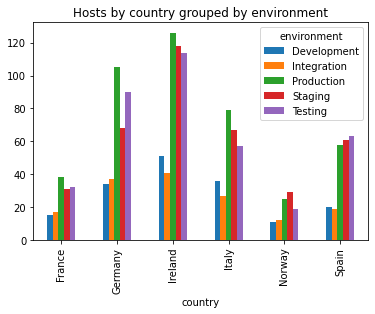

In [12]:
numero_paises.unstack().plot(kind='bar');
plt.title('Hosts by country grouped by environment')
plt.show()

## Crear una figura con 4 gráficos en una malla de 2 filas y 2 columnas
<a id="11"></a>


<a id="12"></a>
### Figura 1 (Arriba izquierda)

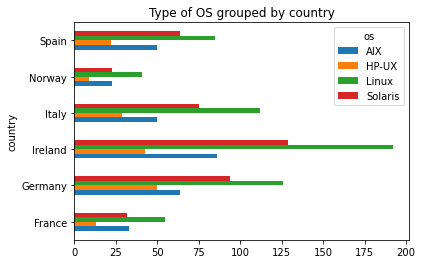

In [13]:
type_os = df.groupby(['country','os']).size().unstack()
type_os.plot(kind='barh');
plt.title('Type of OS grouped by country')
plt.show()

<a id="13"></a>
### Figura 2 (Abajo Izquierda)

In [14]:
df_hosts_country = df['country'].value_counts().reset_index()
df

,hostname,os,environment,country,node
0,ASESP001,AIX,Staging,Spain,1
1,LPNOR001,Linux,Production,Norway,1
2,LDFRA001,Linux,Development,France,1
3,LIIRL001,Linux,Integration,Ireland,1
4,LSITA001,Linux,Staging,Italy,1
...,...,...,...,...,...
1495,LSFRA013,Linux,Staging,France,13
1496,STESP026,Solaris,Testing,Spain,26
1497,ATFRA008,AIX,Testing,France,8
1498,LSESP021,Linux,Staging,Spain,21


In [15]:
df_hosts_country.rename({'index':'country', 'country':'Number of hosts'}, axis=1,inplace=True)

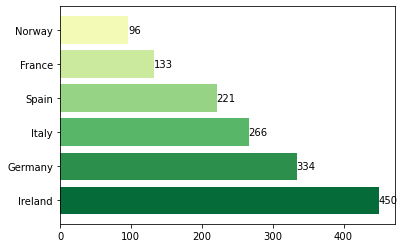

In [16]:
grafico = plt.barh(y=df_hosts_country['country'] , width=df_hosts_country['Number of hosts'],color=sns.color_palette("YlGn_r"));
plt.bar_label(grafico, label_type="edge");


<a id="14"></a>
### Figura 3 (Abajo derecha)
Este es simplemente la figura del punto 10, pero con el 0 dentro de la funcion unstack()

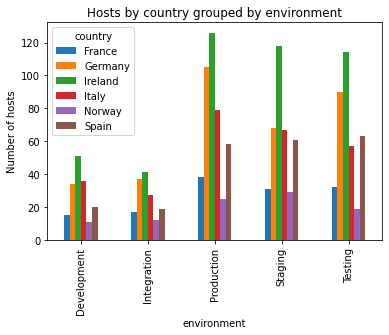

In [17]:
#numero_paises.unstack(0).plot(kind='bar');
numero_paises_df = numero_paises.unstack(0)
numero_paises_df.plot(kind='bar')
plt.title('Hosts by country grouped by environment')
plt.ylabel("Number of hosts")
plt.show()

<a id="15"></a>
### Figura 4 (Arriba derecha)
Utilizo la funcion reset index para tener un **Dataframe** en vez de una **serie** de valores agrupados

In [18]:
df_pie  = df['os'].value_counts().reset_index()
df_pie

,index,os
0,Linux,611
1,Solaris,417
2,AIX,306
3,HP-UX,166


In [19]:
df_pie.rename({'index':'os', 'os':'cantidad'}, axis=1,inplace=True) # Renombro las columnas
df_pie

,os,cantidad
0,Linux,611
1,Solaris,417
2,AIX,306
3,HP-UX,166


Para sacar las proporciones mi idea es utilizar de nuevo la funcion value_counts con normalize=True y con la columna 'os' , para despues multiplicarlo por 100 para obtener las proporciones y despues redondearlo a 2 decimales con la funcion round 

In [20]:
df_pie['porcentaje'] = (df['os'].value_counts(normalize=True).reset_index()['os'])*100
df_pie

,os,cantidad,porcentaje
0,Linux,611,40.733333
1,Solaris,417,27.800000
2,AIX,306,20.400000
3,HP-UX,166,11.066667


In [21]:
df_pie['porcentaje'] = round(df_pie['porcentaje'],2)
df_pie

,os,cantidad,porcentaje
0,Linux,611,40.73
1,Solaris,417,27.80
2,AIX,306,20.40
3,HP-UX,166,11.07


Ahora procedemos a combinar las 2 columnas, la columna de os y de porcentaje para obtener una columna como : 'Linux 35.56%' y que estos valores de la columna labels sean la legenda para el pie chart.

In [22]:
df_pie['labels'] = df_pie['os']+' ('+df_pie['porcentaje'].astype(str)+' %)'

In [23]:
sizes = list(df_pie['cantidad'])
labels = list(df_pie['labels'])

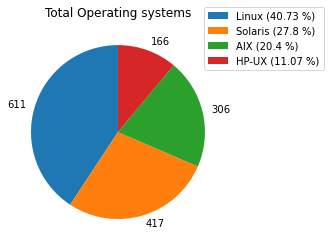

In [24]:
pie = plt.pie(sizes, labels=sizes,startangle=90);
plt.legend(pie[0],labels, bbox_to_anchor=(1,0.7), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.title('Total Operating systems');

<a id="16"></a>
## Figura completa todos los graficos juntos

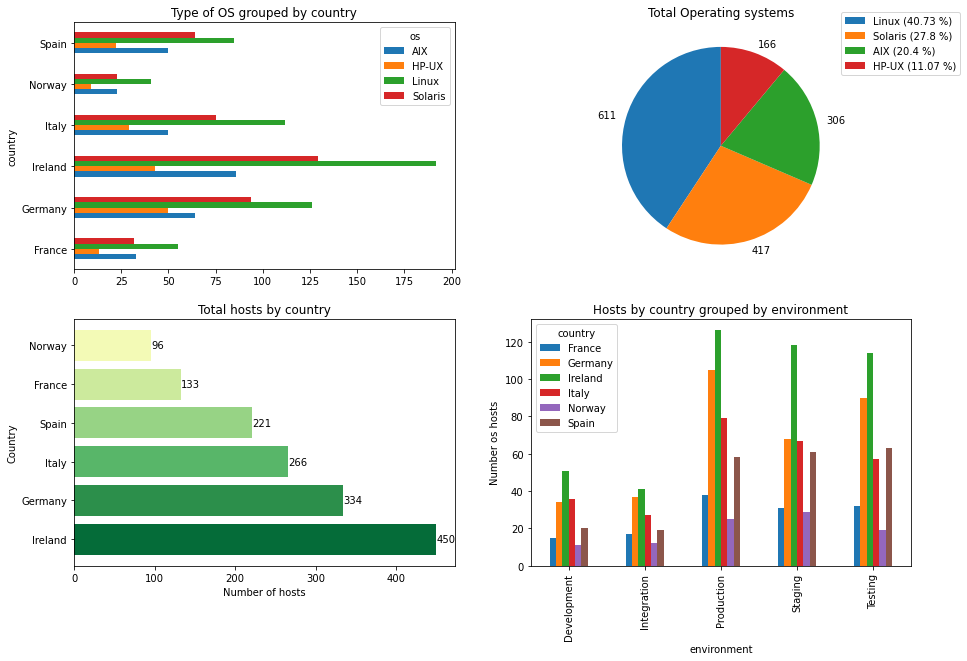

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Figura 1(Arriba Izquierda)
axs[0, 0].set_title('Type of OS grouped by country')
type_os.plot(kind='barh',ax=axs[0,0])

# Figura 2 (Abajo Izquierda)
grafico = axs[1,0].barh(y=df_hosts_country['country'] , width=df_hosts_country['Number of hosts'],color=sns.color_palette("YlGn_r"));
axs[1,0].bar_label(grafico, label_type="edge")
axs[1,0].set_title('Total hosts by country')
axs[1,0].set_ylabel('Country')
axs[1,0].set_xlabel('Number of hosts')

# Figura 3 (Abajo Derecha)
numero_paises_df.plot(kind='bar',ax=axs[1,1],legend=True)
axs[1,1].set_title('Hosts by country grouped by environment')
axs[1,1].set_ylabel('Number os hosts')

# Figura 4 (Arriba Derecha)
pie = axs[0,1].pie(sizes, labels=sizes,startangle=90);
axs[0,1].legend(pie[0],labels, bbox_to_anchor=(.95,0.8), loc="lower right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
axs[0,1].set_title('Total Operating systems');